<a href="https://colab.research.google.com/github/susan-sajadi/stc510/blob/master/Module3Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Module 3 Project**
Prompt: We appreciated your help in stepping in during a bit of an exigent situation. We have a bit calmer of a task for you and one suited to a "Sun Devil." We have some basic crime data for Phoenix (here (Links to an external site.)) and we need to make better sense of it. We want to know where different kinds of crimes are occurring, in which areas crime is growing fastest (or dropping fastest), and whether certain crimes are more common in certain areas of the city. Basically, we don't need maps or anything at this stage, just some data grouped by location (either the type of location or the zip codes) and some trend data.

I mean, if you have the time for a bit of a challenge, we would love for you to bring in some other data to help draw a better picture around this. Are there some factors that affect the crime rate? If there are, we could see if there were ways to see where crime was more likely. We might even ask you to head up our new Pre-Crime unit in the Valley.

The goal is to find basic trends in this data set: 
-Grouping crimes by location type or by zip code (or groups of zip codes)--done
.
Or, on the contrary, looking at types of crimes and where they are most common. --done
Would be good to know which areas have the fastest growing and shrinking crime rates.--
Might even be worth grouping crimes by 
violent and non-violent?--only non violent crime is drug, so this was completed. 


In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date


In [42]:
crimedata = pd.read_csv('phoenixdata.csv')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
spacefreecol = crimedata.columns.str.strip().str.replace('\s+', '_')

I was having some issues with the spacing so added this to put _ in titles instead of spaces to make it easier. 

In [52]:
crimedata.columns = spacefreecol

In [53]:
crimedata

,INC_NUMBER,OCCURRED_ON,OCCURRED_TO,UCR_CRIME_CATEGORY,100_BLOCK_ADDR,ZIP,PREMISE_TYPE
0,201500002168686,2015-11-01T00:00:00,2015-11-11T09:30:00,LARCENY-THEFT,14XX E HIGHLAND AVE,85014.0,PARKING LOT
1,201500002103724,2015-11-01T00:00:00,2015-11-01T15:21:00,DRUG OFFENSE,54XX W INDIAN SCHOOL RD,85031.0,APARTMENT
2,201600000594484,2015-11-01T00:00:00,NaN,RAPE,13XX E ALMERIA RD,85006.0,SINGLE FAMILY HOUSE
3,201500002102327,2015-11-01T00:00:00,2015-11-01T09:00:00,LARCENY-THEFT,51XX N 15TH ST,85014.0,APARTMENT
4,201500002101405,2015-11-01T00:00:00,2015-11-01T05:00:00,MOTOR VEHICLE THEFT,102XX W MEDLOCK AVE,85307.0,SINGLE FAMILY HOUSE
...,...,...,...,...,...,...,...
342358,202100000143005,2021-01-26T23:00:00,NaN,LARCENY-THEFT,20XX W DEER VALLEY RD,85027.0,FENCED COMMERCIAL YARD
342359,202100000141859,2021-01-26T23:00:00,2021-01-27T05:00:00,LARCENY-THEFT,20XX E HARVARD ST,85006.0,VEHICLE
342360,202100000139107,2021-01-26T23:08:00,NaN,ROBBERY,184XX N 7TH ST,85022.0,CONVENIENCE MARKET / STORE
342361,202100000139182,2021-01-26T23:30:00,2021-01-26T23:34:00,AGGRAVATED ASSAULT,92XX N 11TH AVE,85021.0,VEHICLE


In [54]:
crimedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 342363 entries, 0 to 342362
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   INC_NUMBER          342363 non-null  object 
 1   OCCURRED_ON         341944 non-null  object 
 2   OCCURRED_TO         230549 non-null  object 
 3   UCR_CRIME_CATEGORY  342363 non-null  object 
 4   100_BLOCK_ADDR      342363 non-null  object 
 5   ZIP                 342357 non-null  float64
 6   PREMISE_TYPE        340387 non-null  object 
dtypes: float64(1), object(6)
memory usage: 18.3+ MB


In [55]:
crimedata.ZIP.value_counts()

85015.0    17484
85008.0    16145
85009.0    15332
85051.0    15296
85041.0    15070
           ...  
85239.0        1
85209.0        1
85268.0        1
85266.0        1
85259.0        1
Name: ZIP, Length: 112, dtype: int64

Note to self: Titles and labels are case sensitive. 

It appears that based on this data, the top 5 zip codes for crime in Phoenix are: 85015, 85008, 85009, 85041, and 85051.

In [16]:
crimedata['UCR CRIME CATEGORY'].value_counts()

LARCENY-THEFT                            140967
BURGLARY                                  43447
MOTOR VEHICLE THEFT                       29108
DRUG OFFENSE                              23309
AGGRAVATED ASSAULT                        21047
ROBBERY                                   11634
RAPE                                       4171
ARSON                                      1745
MURDER AND NON-NEGLIGENT MANSLAUGHTER       558
Name: UCR CRIME CATEGORY, dtype: int64

In [59]:
crimedata[crimedata.UCR_CRIME_CATEGORY == 'DRUG OFFENSE'].ZIP.value_counts()

85017.0    1922
85009.0    1862
85051.0    1741
85008.0    1622
85015.0    1583
           ... 
85233.0       1
85226.0       1
85210.0       1
85208.0       1
85201.0       1
Name: ZIP, Length: 88, dtype: int64

This shows that in 85017, 85009, 85051,85008,85015 there are the most non-violent offenses (drug offenses).

In [65]:
crimedata.OCCURRED_ON.value_counts()

2019-04-01T00:00:00    61
2020-01-01T00:00:00    53
2020-03-01T00:00:00    51
2019-08-01T00:00:00    51
2019-01-01T00:00:00    46
                       ..
2019-03-16T07:11:00     1
2015-12-28T18:18:00     1
2016-03-02T00:21:00     1
2015-11-02T12:50:00     1
2019-10-26T22:15:00     1
Name: OCCURRED_ON, Length: 216979, dtype: int64

It seems as if crime is increasing in Phoenix, as the highest crime days have been in the last couple of years. 

In [69]:
crimetype = crimedata.groupby('UCR_CRIME_CATEGORY')

In [76]:
crimetype.ZIP.value_counts()

UCR_CRIME_CATEGORY  ZIP    
AGGRAVATED ASSAULT  85017.0    1449
                    85015.0    1442
                    85009.0    1436
                    85008.0    1429
                    85041.0    1273
                               ... 
ROBBERY             85302.0       1
                    85303.0       1
                    85323.0       1
                    85337.0       1
                    85345.0       1
Name: ZIP, Length: 648, dtype: int64

Here we can see which Zip Codes have the most & least crime

In [89]:
crimetype.OCCURRED_ON.value_counts()

UCR_CRIME_CATEGORY  OCCURRED_ON        
AGGRAVATED ASSAULT  2020-08-28T00:00:00    7
                    2019-02-17T00:00:00    6
                    2020-07-08T00:00:00    6
                    2020-04-30T00:00:00    5
                    2020-06-27T00:00:00    5
                                          ..
ROBBERY             2021-01-25T19:10:00    1
                    2021-01-26T10:25:00    1
                    2021-01-26T11:00:00    1
                    2021-01-26T17:21:00    1
                    2021-01-26T23:08:00    1
Name: OCCURRED_ON, Length: 273888, dtype: int64

It appears that in most categories, crime has increased in frequency in 2019 and 2020. 

In [80]:
zipcodes = crimedata.groupby('ZIP')

In [96]:
zipcodes.OCCURRED_ON.value_counts()

ZIP      OCCURRED_ON        
85003.0  2016-01-01T00:00:00    3
         2019-01-18T00:00:00    3
         2019-10-01T00:00:00    3
         2019-11-12T00:00:00    3
         2020-02-19T00:00:00    3
                               ..
85396.0  2018-08-07T09:13:00    1
         2018-10-08T22:20:00    1
         2018-11-13T20:11:00    1
         2018-12-04T21:30:00    1
         2019-07-28T12:08:00    1
Name: OCCURRED_ON, Length: 330123, dtype: int64

In [109]:
crimedata.OCCURRED_ON.value_counts()

2019-04-01T00:00:00    61
2020-01-01T00:00:00    53
2020-03-01T00:00:00    51
2019-08-01T00:00:00    51
2019-01-01T00:00:00    46
                       ..
2019-03-16T07:11:00     1
2015-12-28T18:18:00     1
2016-03-02T00:21:00     1
2015-11-02T12:50:00     1
2019-10-26T22:15:00     1
Name: OCCURRED_ON, Length: 216979, dtype: int64

In [117]:
crimedata['year'] = pd.DatetimeIndex(crimedata['OCCURRED_ON']).year

In [119]:
crimedata.year.value_counts(sort=False)

2015.0    10127
2016.0    63233
2017.0    66056
2018.0    64859
2019.0    68692
2020.0    64424
2021.0     4553
Name: year, dtype: int64

Crim has incresed over time slightly. Since 2021 has just started obviously not much data is collected, and it seems the data must be truncated from 2015. 

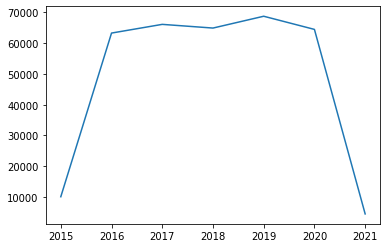

In [121]:
crimedata.year.value_counts(sort=False).plot()

In [133]:
test = zipcodes.year.value_counts(sort = True)

Certain zipcodes however have seen an increase in crime, like 85003. 


